In [31]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.append("../../")
from load_data import get_historical_forecast_pandas, get_historical

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [32]:
region = "CAISO_NORTH"
start = '2024-07-01 00:00Z'
end = '2024-07-02 00:00Z'

In [39]:
def get_forecasts_and_actual(region, start, end):
    df_actual = get_historical(region, start, end)
    df_piv = get_historical_forecast_pandas(region, start, end)

    # subsample down to one forecast per hour and just one day
    df = df_piv[df_piv.columns[0::12]].loc[:start.split(" ")[0]]
    
    # add in actual MOER
    df = pd.concat([df, df_actual.iloc[:-1]], axis=1)
    return df


In [41]:
def plot_forecasts_and_actual(df):
    plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

    # Plot all columns except 'CAISO_NORTH'
    for column in df.columns:
        if column != 'CAISO_NORTH':
            plt.plot(df.index, df[column], label=pd.to_datetime(column).strftime('%Y-%m-%d'))

    # Plot 'CAISO_NORTH' with a dotted line
    plt.plot(df.index, df['CAISO_NORTH'], label='CAISO_NORTH', linestyle='--', linewidth=3, color="k")

    plt.xlabel('time')
    plt.ylabel('MOER (CO2 lbs/MWh)')
    plt.title('Actual signal (dotted) and forecasts')
    plt.grid(True)
    plt.show()

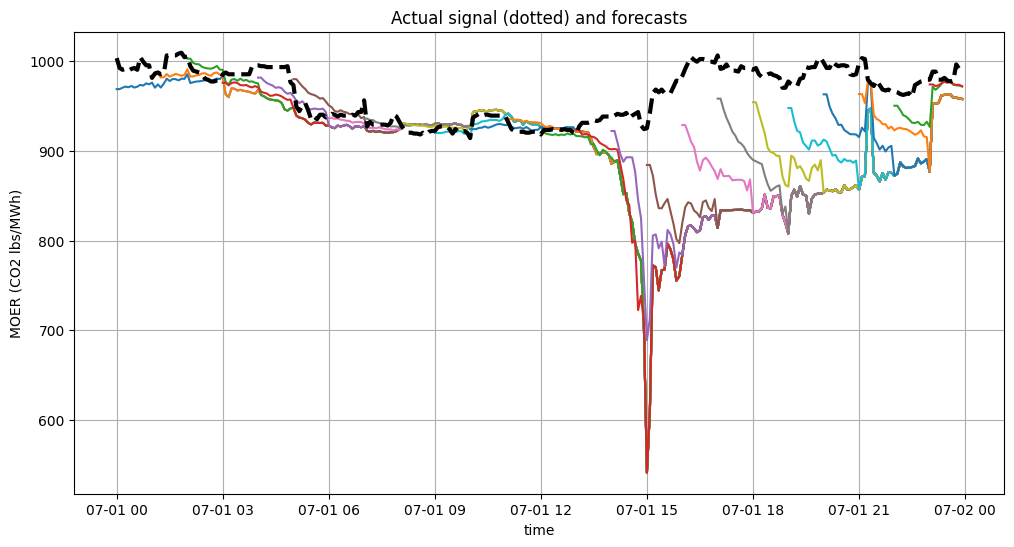

In [42]:
df = get_forecasts_and_actual(region, start, end)
plot(df)

In [46]:
df

,2024-07-01T00:00:00+00:00,2024-07-01T01:00:00+00:00,2024-07-01T02:00:00+00:00,2024-07-01T03:00:00+00:00,2024-07-01T04:00:00+00:00,2024-07-01T05:00:00+00:00,2024-07-01T06:00:00+00:00,2024-07-01T07:00:00+00:00,2024-07-01T08:00:00+00:00,2024-07-01T09:00:00+00:00,...,2024-07-01T16:00:00+00:00,2024-07-01T17:00:00+00:00,2024-07-01T18:00:00+00:00,2024-07-01T19:00:00+00:00,2024-07-01T20:00:00+00:00,2024-07-01T21:00:00+00:00,2024-07-01T22:00:00+00:00,2024-07-01T23:00:00+00:00,2024-07-02T00:00:00+00:00,CAISO_NORTH
point_time,,,,,,,,,,,,,,,,,,,,,
2024-07-01 00:00:00+00:00,968.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1003.0
2024-07-01 00:05:00+00:00,968.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,992.0
2024-07-01 00:10:00+00:00,970.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,990.0
2024-07-01 00:15:00+00:00,971.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,991.0
2024-07-01 00:20:00+00:00,970.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,989.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-01 23:35:00+00:00,962.5,962.5,962.5,962.5,962.5,962.5,962.5,962.5,962.5,962.5,...,962.5,962.5,962.5,962.5,962.5,962.5,976.6,977.5,NaN,977.0
2024-07-01 23:40:00+00:00,959.1,959.1,959.1,959.1,959.1,959.1,959.1,959.1,959.1,959.1,...,959.1,959.1,959.1,959.1,959.1,959.1,973.4,973.9,NaN,978.0
2024-07-01 23:45:00+00:00,959.0,959.0,959.0,959.0,959.0,959.0,959.0,959.0,959.0,959.0,...,959.0,959.0,959.0,959.0,959.0,959.0,972.8,973.2,NaN,996.0


<Axes: xlabel='point_time'>

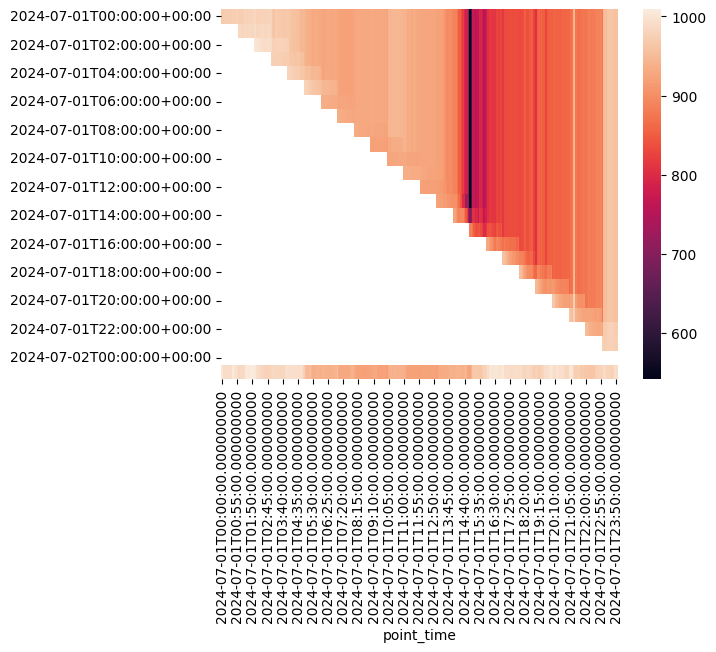

In [47]:
# we can plot two time-axis to show how the forecast evolves over time
# the x-axis is the time the forecast is for
# the y-axis is the time the forecat was generated.
# so for example a vertical line corresponds to a single point in time;
# going down the vertical line corresponds to forecasts about that point
# in time generated later and later 
sns.heatmap(df.T, annot=False)